**Will the customer accept the coupon?**

We shall try to answer this question by analyzing the available data stored in the csv file. 

There were five different types of coupons for the following places: 
1. less expensive restaurants
2. coffee houses
3. carryout and takeaway
4. bars
5. more expensive restaurants
  
The data was collected via a survey that described different driving scenarios, including the destination, current time, weather, and passenger, and then asked people whether they will accept the coupon if they were the driver.

There were three possible answers people could choose from:
1. “Right away”
2. “Later, before the coupon expires”
3. “No, I do not want the coupon”


**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Read the dataset**

In [2]:
coupons = pd.read_csv('/Users/ronaldobantayan/Documents/MachineLearningAI/coupons.csv')

**Observe the columns or features**

In [3]:
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**Size of dataset**  
There are 26 columns or features in the dataset including 12,684 rows.  
An examination of the information hinted at where the missing values were.  
This will be confirmed later in the columns for 'car', 'Bar', 'CoffeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20to50'.

In [4]:
coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**Descriptive statistics**  
Below are descriptive statistics of the numerical columns. 

In [5]:
coupons.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Missing values**  
There were 13,370 missing values in the dataset.

In [6]:
total_missing_values = coupons.isnull().sum().sum()  # count the total number of missing values
total_missing_values

np.int64(13370)

**A bar chart of missing values is shown below**   
The missing values were further verified.

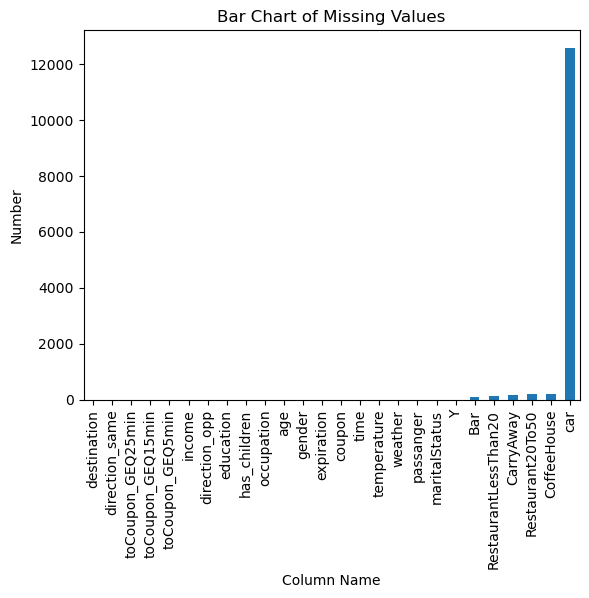

In [7]:
coupons.isnull().sum().sort_values().plot(kind='bar')
plt.title('Bar Chart of Missing Values')
plt.xlabel('Column Name')
plt.ylabel('Number')
plt.show()

**Rows with missing values**  
The rows with missing values were examined. Almost all rows (99%) had missing values (12,576 rows), therefore, ways had to be found to replace these missing values otherwise we would lose most of the data in the dataset.

In [8]:
rows_with_missing_values = coupons[coupons.isnull().any(axis=1)]  # examine the rows with missing values
rows_with_missing_values

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [9]:
pct_rows_with_missing_values = (len(rows_with_missing_values) / len(coupons)) * 100 # calculate the percentage of rows with missing values
print(f'The percentage of rows with missing values was {round(pct_rows_with_missing_values, 2)}%')

The percentage of rows with missing values was 99.15%


**Removal of duplicate rows**  
Since the number of duplicate rows was low (74 rows) they were removed and did not warrant their further investigation. It was verified that 12,610 rows were left after the removal of duplicate rows.

In [10]:
duplicates = len(coupons[coupons.duplicated()])  # number of duplicate rows
print(f'There were {duplicates} duplicate rows.')

There were 74 duplicate rows.


In [11]:
coupons = coupons.drop_duplicates()  # remove duplicate rows
print(f'{len(coupons)} rows were left after the removal of duplicate rows.')

12610 rows were left after the removal of duplicate rows.


**Proportion of the total observations that chose to accept the coupons**   
Computed after the removal of duplicate rows.

In [12]:
proportion_total = coupons['Y'].value_counts().iloc[0] / len(coupons)  # count the number of accepted coupons and divide it by the
proportion_total                                                       # total number of coupons

np.float64(0.5675654242664552)

**Columns with missing values**  
As shown earlier, there were 6 columns with missing values.  
The number of respective missing values in these columns were verified.

In [13]:
columns_with_missing_values = coupons.columns[coupons.isnull().any()].tolist()  # list column names with missing values
columns_with_missing_values

['car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [14]:
print(f'There were {len(columns_with_missing_values)} columns with missing values.')  # the number of columns with missing values

There were 6 columns with missing values.


**Reformatting column names**  
A column name spelling was corrected. In addition, all column names were capitalized for consistency. 

In [15]:
coupons = coupons.rename(columns = {'passanger':'passenger'})  # correct spelling of 'passenger' column
coupons.columns = coupons.columns.str.capitalize()  # capitalize column names for consistency
coupons.head()

,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Tocoupon_geq5min,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**Verification of the number of missing values in the columns**

In [16]:
columns_with_missing_values = coupons.columns[coupons.isnull().any()].tolist()  # list column names with missing values
columns_with_missing_values

['Car',
 'Bar',
 'Coffeehouse',
 'Carryaway',
 'Restaurantlessthan20',
 'Restaurant20to50']

In [17]:
# report the number of missing values in each column
for i in columns_with_missing_values:
    missing_values = coupons[i].isnull().sum()  # number of missing values in the column
    print(f'The number of missing values in the column {i} was {missing_values}.')

The number of missing values in the column Car was 12502.
The number of missing values in the column Bar was 107.
The number of missing values in the column Coffeehouse was 217.
The number of missing values in the column Carryaway was 150.
The number of missing values in the column Restaurantlessthan20 was 129.
The number of missing values in the column Restaurant20to50 was 189.


**Column 'Car' removed**  
The column 'Car' was removed because of the high number of missing values (12,502) in this column while the others were retained for further processing.

In [18]:
coupons = coupons.drop('Car', axis=1)  # remove the column 'Car' which had a large number of missing values (12,576)
coupons.columns.tolist()  # confirm the removal of the column 'Car'

['Destination',
 'Passenger',
 'Weather',
 'Temperature',
 'Time',
 'Coupon',
 'Expiration',
 'Gender',
 'Age',
 'Maritalstatus',
 'Has_children',
 'Education',
 'Occupation',
 'Income',
 'Bar',
 'Coffeehouse',
 'Carryaway',
 'Restaurantlessthan20',
 'Restaurant20to50',
 'Tocoupon_geq5min',
 'Tocoupon_geq15min',
 'Tocoupon_geq25min',
 'Direction_same',
 'Direction_opp',
 'Y']

**Value count verification of column elements**

In [19]:
columns_with_missing_values = coupons.columns[coupons.isnull().any()].tolist()  # list column names with missing values
columns_with_missing_values

['Bar', 'Coffeehouse', 'Carryaway', 'Restaurantlessthan20', 'Restaurant20to50']

In [20]:
# display the value count for each column
for i in columns_with_missing_values:
    count_column = coupons[i].value_counts()  # verify the distribution of the values in the column
    print(f'The value count for column {count_column} \n')

The value count for column Bar
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64 

The value count for column Coffeehouse
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64 

The value count for column Carryaway
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64 

The value count for column Restaurantlessthan20
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64 

The value count for column Restaurant20to50
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64 



**Replacement of missing values**  
After verification of the distribution of the column elements, the missing values were replaced with the respective column modes suitable for categorical data imputation.

In [21]:
columns_with_missing_values = coupons.columns[coupons.isnull().any()].tolist()  # list column names with missing values
columns_with_missing_values

['Bar', 'Coffeehouse', 'Carryaway', 'Restaurantlessthan20', 'Restaurant20to50']

In [22]:
for i in columns_with_missing_values:
    mode_column = coupons[i].mode()  # get the mode of the column
    coupons[i] = coupons[i].fillna(str(mode_column))  # fill the missing values in the column with the mode of the column

**Confirm replacement of missing values**

In [23]:
total_missing_values = coupons.isnull().sum().sum()  # count the total number of missing values
total_missing_values

np.int64(0)

In [24]:
coupons.info()  # confirm no more rows with missing values

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Destination           12610 non-null  object
 1   Passenger             12610 non-null  object
 2   Weather               12610 non-null  object
 3   Temperature           12610 non-null  int64 
 4   Time                  12610 non-null  object
 5   Coupon                12610 non-null  object
 6   Expiration            12610 non-null  object
 7   Gender                12610 non-null  object
 8   Age                   12610 non-null  object
 9   Maritalstatus         12610 non-null  object
 10  Has_children          12610 non-null  int64 
 11  Education             12610 non-null  object
 12  Occupation            12610 non-null  object
 13  Income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  Coffeehouse           12610 non-null  obj

In [25]:
rows_with_missing_values = coupons[coupons.isnull().any(axis=1)]  # further confirm no more rows with missing values
print(len(rows_with_missing_values))

0


**Transform column 'Income' data type to numeric**  
In preparation for further analysis, plotting and visualization, the column 'Income' data type was transformed to a numeric data type.  
For the highest and lowest brackets, the values of 100000 and 0 were assigned, respectively (consistent with the interval of 12500 used in the data).  
For the others, the lower range of the bracket was assigned.

In [26]:
value_counts_Income = coupons['Income'].value_counts()  # examine column elements
value_counts_Income

Income
$25000 - $37499     2006
$12500 - $24999     1825
$37500 - $49999     1795
$100000 or More     1717
$50000 - $62499     1655
Less than $12500    1034
$87500 - $99999      879
$75000 - $87499      856
$62500 - $74999      843
Name: count, dtype: int64

In [27]:
# replace highest and lowest brackets as explained above
coupons['Income'] = coupons['Income'].replace({'$100000 or More':'$100000', 'Less than $12500':'$0'})
# remove spaces
coupons['Income'] = coupons['Income'].str.replace(r'[\s]', '', regex=True)
coupons['Income']

0        $37500-$49999
1        $37500-$49999
2        $37500-$49999
3        $37500-$49999
4        $37500-$49999
             ...      
12679    $75000-$87499
12680    $75000-$87499
12681    $75000-$87499
12682    $75000-$87499
12683    $75000-$87499
Name: Income, Length: 12610, dtype: object

In [28]:
# split at the hyphen then grab the first item
coupons['Income'] = coupons['Income'].str.split('-').apply(lambda x: x[0])
coupons['Income']

0        $37500
1        $37500
2        $37500
3        $37500
4        $37500
          ...  
12679    $75000
12680    $75000
12681    $75000
12682    $75000
12683    $75000
Name: Income, Length: 12610, dtype: object

In [29]:
# split at the $ sign then get the second item
coupons['Income'] = coupons['Income'].str.split('$').apply(lambda x: x[1])
coupons['Income']

0        37500
1        37500
2        37500
3        37500
4        37500
         ...  
12679    75000
12680    75000
12681    75000
12682    75000
12683    75000
Name: Income, Length: 12610, dtype: object

In [30]:
# change data type from string to integer
coupons['Income'] = coupons['Income'].astype(str).astype(int)

**Transform column 'Age' data type to numeric**  
In preparation for further analysis, plotting and visualization, the column 'Age' data type was transformed to a numeric data type.  
For the highest and lowest brackets, the values of 51 and 16 were assigned, respectively (consistent with the interval of 5 used in the data).  

In [31]:
value_counts_Age = coupons['Age'].value_counts()  # examine column elements
value_counts_Age

Age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [32]:
# replace highest and lowest brackets as explained above
coupons['Age'] = coupons['Age'].replace({'50plus':'51', 'below21':'16'})

In [33]:
# change data type from string to integer
coupons['Age'] = coupons['Age'].astype(str).astype(int)

**Clean up columns 'Bar', 'Coffeehouse', 'Carryaway', 'Restaurantlessthan20', 'Restaurant20to50'.**  
In preparation for plotting and visualization, unwanted characters had to be removed from these columns.

In [34]:
# examine elements of column 'Bar'
value_counts_Bar = coupons['Bar'].value_counts()
value_counts_Bar

Bar
never                                   5178
less1                                   3438
1~3                                     2468
4~8                                     1071
gt8                                      348
0    never\nName: Bar, dtype: object     107
Name: count, dtype: int64

In [35]:
# remove 'never\nName: Bar, dtype: object' from the column 'Bar' elements
coupons['Bar'] = coupons['Bar'].replace('0    never\nName: Bar, dtype: object', '0')

In [36]:
# examine elements of column 'Coffeehouse'
value_counts_Coffeehouse = coupons['Coffeehouse'].value_counts()
value_counts_Coffeehouse

Coffeehouse
less1                                           3362
1~3                                             3199
never                                           2946
4~8                                             1779
gt8                                             1107
0    less1\nName: Coffeehouse, dtype: object     217
Name: count, dtype: int64

In [37]:
# remove 'less1\nName: Coffeehouse, dtype: object' from the column 'Coffeehouse' elements
coupons['Coffeehouse'] = coupons['Coffeehouse'].replace('0    less1\nName: Coffeehouse, dtype: object', '0')

In [38]:
# examine elements of column 'Carryaway'
value_counts_Carryaway = coupons['Carryaway'].value_counts()
value_counts_Carryaway

Carryaway
1~3                                         4645
4~8                                         4242
less1                                       1849
gt8                                         1572
never                                        152
0    1~3\nName: Carryaway, dtype: object     150
Name: count, dtype: int64

In [39]:
# remove '1~3\nName: Carryaway, dtype: object' from the column 'Carryaway' elements
coupons['Carryaway'] = coupons['Carryaway'].replace('0    1~3\nName: Carryaway, dtype: object', '0')

In [40]:
# examine elements of column 'Restaurantlessthan20'
value_counts_Restaurantlessthan20 = coupons['Restaurantlessthan20'].value_counts()
value_counts_Restaurantlessthan20

Restaurantlessthan20
1~3                                                    5356
4~8                                                    3553
less1                                                  2071
gt8                                                    1282
never                                                   219
0    1~3\nName: Restaurantlessthan20, dtype: object     129
Name: count, dtype: int64

In [41]:
# remove '1~3\nName: Restaurantlessthan20, dtype: object' from the column 'Restaurantlessthan20' elements
coupons['Restaurantlessthan20'] = coupons['Restaurantlessthan20'].replace('0    1~3\nName: Restaurantlessthan20, dtype: object', '0')

In [42]:
# examine elements of column 'Restaurant20to50'
value_counts_Restaurant20to50 = coupons['Restaurant20to50'].value_counts()
value_counts_Restaurant20to50

Restaurant20to50
less1                                                6041
1~3                                                  3266
never                                                2122
4~8                                                   728
gt8                                                   264
0    less1\nName: Restaurant20to50, dtype: object     189
Name: count, dtype: int64

In [43]:
# remove 'less1\nName: Restaurant20to50, dtype: object' from the column 'Restaurant20to50' elements
coupons['Restaurant20to50'] = coupons['Restaurant20to50'].replace('0    less1\nName: Restaurant20to50, dtype: object', '0')

**Change data type from numeric to object for columns 'Has_children', 'Tocoupon_geq5min', 'Tocoupon_geq15min', 'Tocoupon_geq25min', 'Direction_same', 'Direction_opp'**  
In preparation for further analysis, plotting and visualization, the above mentioned columns data type was changed to an object data type from a numeric data type. 

In [44]:
coupons['Has_children'] = coupons['Has_children'].astype(str)
coupons['Tocoupon_geq5min'] = coupons['Tocoupon_geq5min'].astype(str)
coupons['Tocoupon_geq15min'] = coupons['Tocoupon_geq15min'].astype(str)
coupons['Tocoupon_geq25min'] = coupons['Tocoupon_geq25min'].astype(str)
coupons['Direction_same'] = coupons['Direction_same'].astype(str)
coupons['Direction_opp'] = coupons['Direction_opp'].astype(str)

**Replace the character '~'**  
In preparation for further analysis, plotting and visualization, the character '~' was replaced with '-' in the following columns: 
'Bar', 'Coffeehouse', 'Carryaway', 'Restaurantlessthan20', 'Restaurant20to50'.

In [45]:
coupons['Bar'] = coupons['Bar'].str.replace('~', '-', regex=True)
coupons['Coffeehouse'] = coupons['Coffeehouse'].str.replace('~', '-', regex=True)
coupons['Carryaway'] = coupons['Carryaway'].str.replace('~', '-', regex=True)
coupons['Restaurantlessthan20'] = coupons['Restaurantlessthan20'].str.replace('~', '-', regex=True)
coupons['Restaurant20to50'] = coupons['Restaurant20to50'].str.replace('~', '-', regex=True)

**Plotting and visualization**


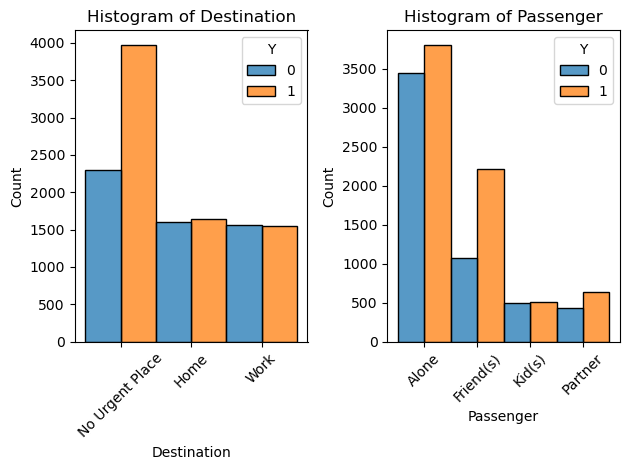

In [46]:
# subplots for 'Destination' and 'Passenger' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Destination', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Destination')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Passenger', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Passenger')

plt.tight_layout()
plt.show()

**Observation:** Coupons were more likely to be accepted when the destination was 'No Urgent Place'(63%). The chances were about even for those going to work (50%) or home (51%).  
When Friend(s) (67%) or a Partner (59%) were the passenger of the car, coupons were more accepted compared to when Alone (52%) or Kid(s) (50%) were the passenger.

**Computation for percent coupon acceptance of 'Destination' column elements**

In [47]:
list_Destination = coupons['Destination'].unique()
pct_acceptance_Destination = coupons.query('Destination in @list_Destination').groupby('Destination')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Destination

,Y
Destination,
No Urgent Place,0.633418
Home,0.506192
Work,0.498715


**Computation for percent coupon acceptance of 'Passenger' column elements**

In [48]:
list_Passenger = coupons['Passenger'].unique()
pct_acceptance_Passenger = coupons.query('Passenger in @list_Passenger').groupby('Passenger')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Passenger

,Y
Passenger,
Friend(s),0.673147
Partner,0.594013
Alone,0.524421
Kid(s),0.504496


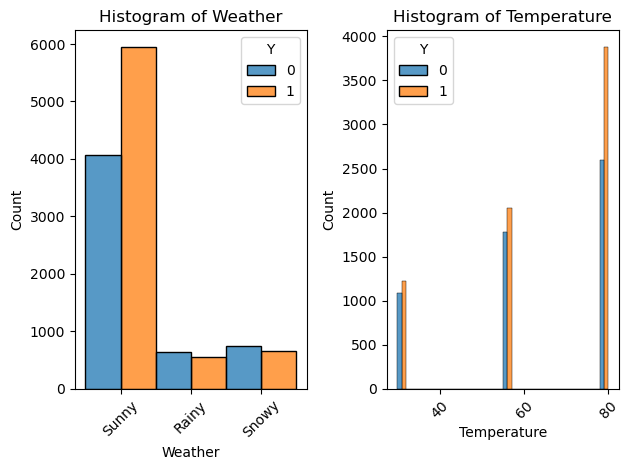

In [49]:
# subplots for 'Weather' and 'Temperature' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Weather', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Weather')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Temperature', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Temperature')

plt.tight_layout()
plt.show()

**Observation:**  Coupons were more accepted during sunny (59%) weather and temperatures of 80 (60%), 55 (54%) and 30 (53%) compared to rainy (46%) and snowy (47%) weather. The temperature histogram showed that the acceptance of coupons increased exponentially as the weather warmed up. This could be investigated further with a regression analysis.

**Computation for percent coupon acceptance of 'Weather' column elements**

In [50]:
list_Weather = coupons['Weather'].unique()
pct_acceptance_Weather = coupons.query('Weather in @list_Weather').groupby('Weather')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Weather

,Y
Weather,
Sunny,0.593447
Snowy,0.471725
Rainy,0.463394


**Computation for percent coupon acceptance of 'Temperature' column elements**

In [51]:
list_Temperature = coupons['Temperature'].unique()
pct_acceptance_Temperature = coupons.query('Temperature in @list_Temperature').groupby('Temperature')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Temperature

,Y
Temperature,
80,0.598610
55,0.536815
30,0.531453


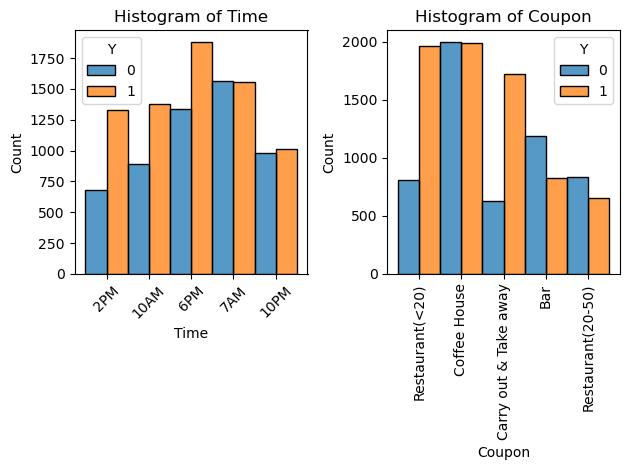

In [52]:
# subplots for 'Time' and 'Coupon' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Time', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Time')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Coupon', hue='Y', multiple='dodge')
plt.xticks(rotation=90)
plt.title('Histogram of Coupon')

plt.tight_layout()
plt.show()

**Observation:**  There was more acceptance of coupons at 10AM (61%), 2PM (66%), 6PM (58%) as opposed to 10PM (51%) and in the morning at 7AM (50%).  
'Carry out & Take away' (73%) and 'Restaurant(<20)' (71%) were the popular coupons against 'Coffee House' (50%), 'Restaurant (20-50)' (44%) and 'Bar' (41%).

**Computation for percent coupon acceptance of 'Time' column elements**

In [53]:
list_Time = coupons['Time'].unique()
pct_acceptance_Time = coupons.query('Time in @list_Time').groupby('Time')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Time

,Y
Time,
2PM,0.661515
10AM,0.607662
6PM,0.584161
10PM,0.508254
7AM,0.498715


**Computation for percent coupon acceptance of 'Coupon' column elements**

In [54]:
list_Coupon = coupons['Coupon'].unique()
pct_acceptance_Coupon = coupons.query('Coupon in @list_Coupon').groupby('Coupon')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Coupon

,Y
Coupon,
Carry out & Take away,0.733788
Restaurant(<20),0.707809
Coffee House,0.498621
Restaurant(20-50),0.441532
Bar,0.409950


**Bar plot of 'Coupon' column**

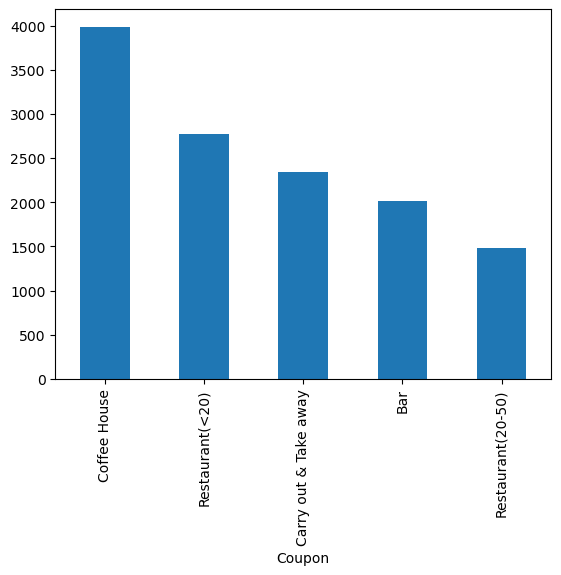

In [55]:
coupons['Coupon'].value_counts().plot(kind = 'bar');  # get first the value counts which are numeric

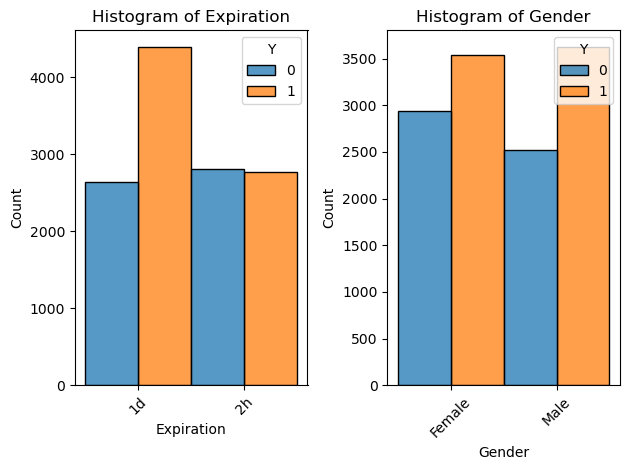

In [56]:
# subplots for 'Expiration' and 'Gender' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Expiration', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Expiration')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Gender', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Gender')

plt.tight_layout()
plt.show()

**Observation:**  Coupons with 1d (62%) expiration were favored against 2h (50%). While both female (55%) and male were likely to accept coupons, males (59%) were more likely to accept coupons.

**Computation for percent coupon acceptance of 'Expiration' column elements**

In [57]:
list_Expiration = coupons['Expiration'].unique()
pct_acceptance_Expiration = coupons.query('Expiration in @list_Expiration').groupby('Expiration')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Expiration

,Y
Expiration,
1d,0.624378
2h,0.495967


**Computation for percent coupon acceptance of 'Gender' column elements**

In [58]:
list_Gender = coupons['Gender'].unique()
pct_acceptance_Gender = coupons.query('Gender in @list_Gender').groupby('Gender')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Gender

,Y
Gender,
Male,0.589806
Female,0.546452


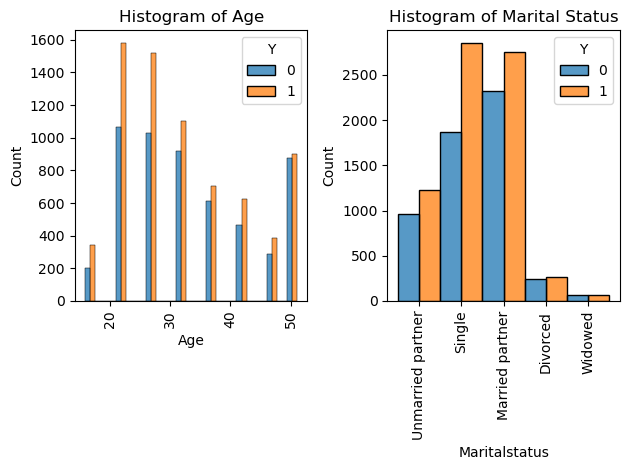

In [59]:
# subplots for 'Age' and 'Maritalstatus' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Age', hue='Y', multiple='dodge')
plt.xticks(rotation=90)
plt.title('Histogram of Age')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Maritalstatus', hue='Y', multiple='dodge')
plt.xticks(rotation=90)
plt.title('Histogram of Marital Status')

plt.tight_layout()
plt.show()

**Observation:**  Those below 21 (63%), 21 (60%), 26 (60%) are more likely to accept coupons compared to 31 (55%), 36 (54%), 41 (57%), 46 (57%) and above 50 (51%).  
Single (60%), unmarried (56%) and married partners (54%) were likely to accept coupons compared to divorced (52%) and widowed (48%).

**Computation for percent coupon acceptance of 'Age' column elements**

In [60]:
list_Age = coupons['Age'].unique()
pct_acceptance_Age = coupons.query('Age in @list_Age').groupby('Age')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Age

,Y
Age,
16,0.632353
21,0.597653
26,0.595369
46,0.573134
41,0.572084
31,0.545815
36,0.535308
51,0.507019


**Computation for percent coupon acceptance of 'Maritalstatus' column elements**

In [61]:
list_Maritalstatus = coupons['Maritalstatus'].unique()
pct_acceptance_Maritalstatus = coupons.query('Maritalstatus in @list_Maritalstatus').groupby('Maritalstatus')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Maritalstatus

,Y
Maritalstatus,
Single,0.604538
Unmarried partner,0.561098
Married partner,0.542423
Divorced,0.526419
Widowed,0.476923


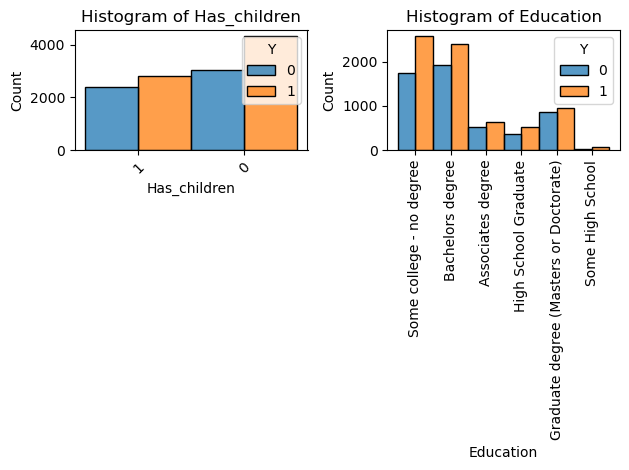

In [62]:
# subplots for 'Has_children' and 'Education' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Has_children', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Has_children')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Education', hue='Y', multiple='dodge')
plt.xticks(rotation=90)
plt.title('Histogram of Education')

plt.tight_layout()
plt.show()

**Observation:**  Those with no kids (59%) are more likely to accept coupons than those with kids (54%).  
'Some high school' (72%), 'Some college - no degree' (60%) and 'High School Graduate' (59%) are more likely to accept coupons compared to 'Bachelors degree' (55%), 'Associate Degree' (55%) and 'Graduate degree (Masters or Doctorate) (52%). 

**Computation for percent coupon acceptance of 'Has_children' column elements**

In [63]:
list_Has_children = coupons['Has_children'].unique()
pct_acceptance_Has_children = coupons.query('Has_children in @list_Has_children').groupby('Has_children')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Has_children

,Y
Has_children,
0,0.586347
1,0.541037


**Computation for percent coupon acceptance of 'Education' column elements**

In [64]:
list_Education = coupons['Education'].unique()
pct_acceptance_Education = coupons.query('Education in @list_Education').groupby('Education')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Education

,Y
Education,
Some High School,0.715909
Some college - no degree,0.595838
High School Graduate,0.591769
Bachelors degree,0.554013
Associates degree,0.552265
Graduate degree (Masters or Doctorate),0.523262


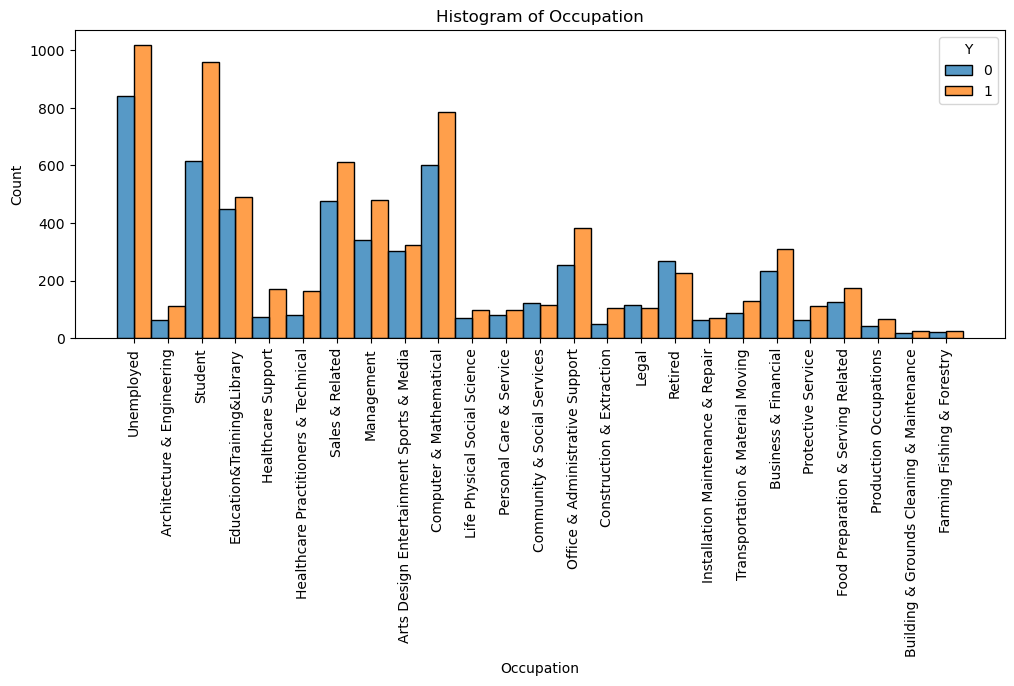

In [65]:
plt.figure(figsize=(12,4))
sns.histplot(coupons, x='Occupation', hue='Y', multiple='dodge')
plt.xticks(rotation=90)
plt.title('Histogram of Occupation')
plt.show()

**Observation:**  Most of the occupations were more likely to accept coupons led by Healthcare Support (70%), Construction & Extraction (69%), Healthcare Practitioners & Technical (68%), Protective Service (64%), Architecture & Engineering (63%), Production Occupations (62%), Student (61%), Office & Administrative Support (60%), Transportation & Material Moving (60%), Building & Grounds Cleaning & Maintenance (59%), Management (59%), Food Preparation & Serving Related (58%), Life Physical Social Science (58%), Business & Financial (57%), Computer & Mathematical (57%) and Sales & Related (56%). Those who were unlikely to accept coupons: Community & Social Services (49%), Legal (47%), Retired (46%)

**Computation for percent coupon acceptance of 'Occupation' column elements**

In [66]:
list_Occupation = coupons['Occupation'].unique()
pct_acceptance_Occupation = coupons.query('Occupation in @list_Occupation').groupby('Occupation')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Occupation

,Y
Occupation,
Healthcare Support,0.698347
Construction & Extraction,0.688312
Healthcare Practitioners & Technical,0.676230
Protective Service,0.643678
Architecture & Engineering,0.634286
Production Occupations,0.620370
Student,0.609524
Office & Administrative Support,0.600313
Transportation & Material Moving,0.596330


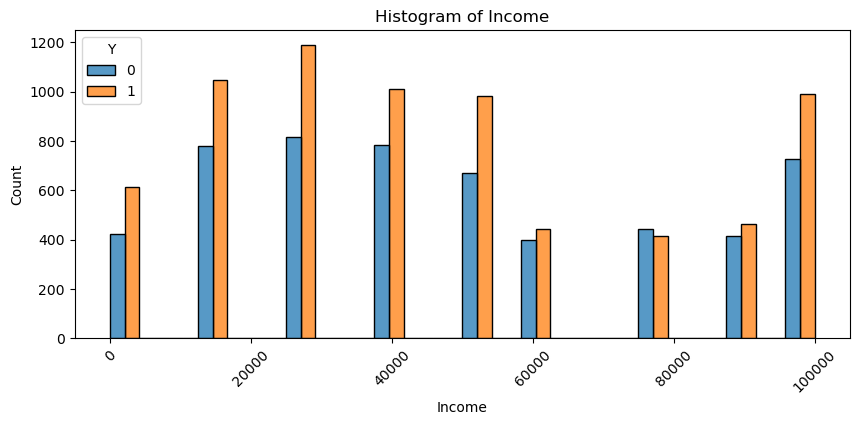

In [67]:
plt.figure(figsize=(10,4))
sns.histplot(coupons, x='Income', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Income')
plt.show()

**Observation:**  Coupons were likely to be accepted at the following income levels: ) 0 to less than 12500 (59%), 12500 to less than 25000 (57%), 25000 to less than 37500 (59%), 37500 to less than 50000 (56%), 50000 to less than 62500 (59%), then became less likely at 62500 to less than 75000 (52%), went down at 75000 to less than 87500 (48%) and then went up a little bit at 87500 to less than 100000 (53%) and higher at more than 100000 (58%). 

**Computation for percent coupon acceptance of 'Income' column elements**

In [68]:
list_Income = coupons['Income'].unique()
pct_acceptance_Income = coupons.query('Income in @list_Income').groupby('Income')[['Y']].mean()\
    .sort_values(by='Income')
pct_acceptance_Income

,Y
Income,
0,0.591876
12500,0.573699
25000,0.593220
37500,0.562674
50000,0.594562
62500,0.525504
75000,0.483645
87500,0.529010
100000,0.577752


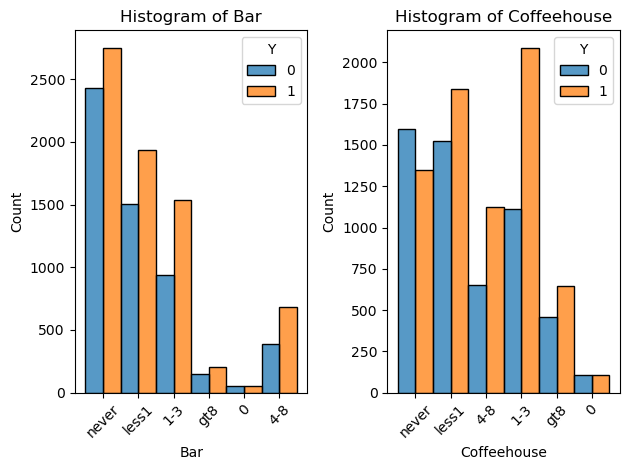

In [69]:
# subplots for 'Bar' and 'Coffeehouse' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Bar', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Bar')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Coffeehouse', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Coffeehouse')

plt.tight_layout()
plt.show()

**Observation:**  'Bar' coupons were more likely to be accepted for '4-8' (64%), '1-3' (62%), 'gt8' (58%), 'less1' (56%), 'never' (53%) and '0' (51%).  
'Coffeehouse' coupons were popular for '1-3'(65%), '4-8' (63%), 'gt8' (58%), 'less1' (54%), and '0' (51%) but unlikely for 'never' (46%).

**Computation for percent coupon acceptance of 'Bar' column elements**

In [70]:
list_Bar = coupons['Bar'].unique()
pct_acceptance_Bar = coupons.query('Bar in @list_Bar').groupby('Bar')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Bar

,Y
Bar,
4-8,0.635854
1-3,0.621151
gt8,0.577586
less1,0.563118
never,0.531286
0,0.514019


**Computation for percent coupon acceptance of 'Coffeehouse' column elements**

In [71]:
list_Coffeehouse = coupons['Coffeehouse'].unique()
pct_acceptance_Coffeehouse = coupons.query('Coffeehouse in @list_Coffeehouse').groupby('Coffeehouse')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Coffeehouse

,Y
Coffeehouse,
1-3,0.653017
4-8,0.632378
gt8,0.583559
less1,0.546996
0,0.506912
never,0.457570


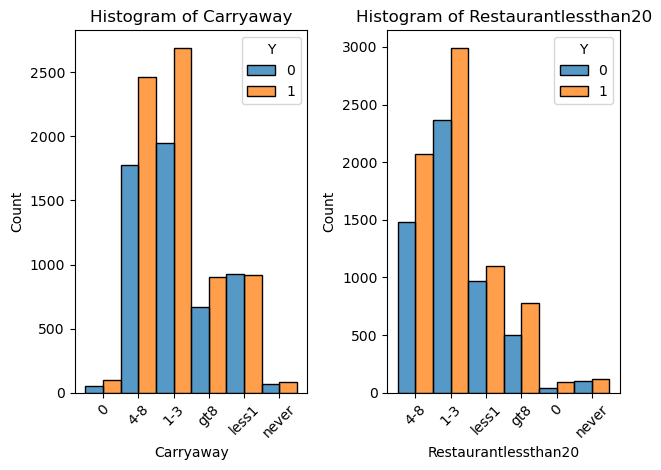

In [72]:
# subplots for 'Carryaway' and 'Restaurantlessthan20' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Carryaway', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Carryaway')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Restaurantlessthan20', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Restaurantlessthan20')

plt.tight_layout()
plt.show()

**Observation:**  'Carryaway' coupons were accepted more at '0' (67%), '4-8' (58%), '1-3' (58%), 'gt8' (57%), 'never' (53%) and less at 'less1' (50%).  
'Restaurantlessthan20' coupons were accepted more at '0' (69%), 'gt8' (61%), '4-8' (58%), '1-3' (56%), 'never' (53%) and 'less1' (53%).

**Computation for percent coupon acceptance of 'Carryaway' column elements**

In [73]:
list_Carryaway = coupons['Carryaway'].unique()
pct_acceptance_Carryaway = coupons.query('Carryaway in @list_Carryaway').groupby('Carryaway')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Carryaway

,Y
Carryaway,
0,0.666667
4-8,0.580387
1-3,0.579763
gt8,0.572519
never,0.532895
less1,0.498107


**Computation for percent coupon acceptance of 'Restaurantlessthan20' column elements**

In [74]:
list_Restaurantlessthan20 = coupons['Restaurantlessthan20'].unique()
pct_acceptance_Restaurantlessthan20 = coupons.query('Restaurantlessthan20 in @list_Restaurantlessthan20')\
    .groupby('Restaurantlessthan20')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Restaurantlessthan20

,Y
Restaurantlessthan20,
0,0.689922
gt8,0.607644
4-8,0.584014
1-3,0.558999
never,0.534247
less1,0.532593


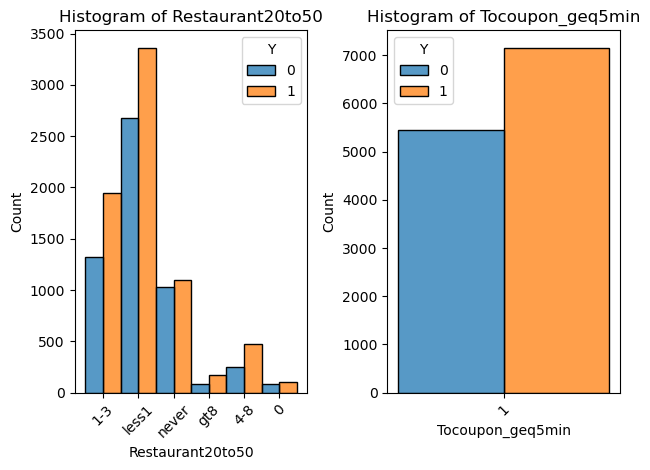

In [75]:
# subplots for 'Restaurant20to50' and 'Tocoupon_geq5min' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Restaurant20to50', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Restaurant20to50')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Tocoupon_geq5min', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Tocoupon_geq5min')

plt.tight_layout()
plt.show()

**Observation:**  'Restaurant20to50' coupons were more likely to be accepted for 'gt8' (66%), '4-8' (66%), '1-3' (59%), 'less1' (56%), '0' (56%) and 'never' (52%).  
'Tocoupon_geq5min' was likely to accept coupons (57%) at '1'.  There was no data on '0'.

**Computation for percent coupon acceptance of 'Restaurant20to50' column elements**

In [76]:
list_Restaurant20to50 = coupons['Restaurant20to50'].unique()
pct_acceptance_Restaurant20to50 = coupons.query('Restaurant20to50 in @list_Restaurant20to50')\
    .groupby('Restaurant20to50')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Restaurant20to50

,Y
Restaurant20to50,
gt8,0.662879
4-8,0.655220
1-3,0.594611
less1,0.556696
0,0.555556
never,0.516023


**Computation for percent coupon acceptance of 'Tocoupon_geq5min' column elements**

In [77]:
list_Tocoupon_geq5min = coupons['Tocoupon_geq5min'].unique()
pct_acceptance_Tocoupon_geq5min = coupons.query('Tocoupon_geq5min in @list_Tocoupon_geq5min')\
    .groupby('Tocoupon_geq5min')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Tocoupon_geq5min

,Y
Tocoupon_geq5min,
1,0.567565


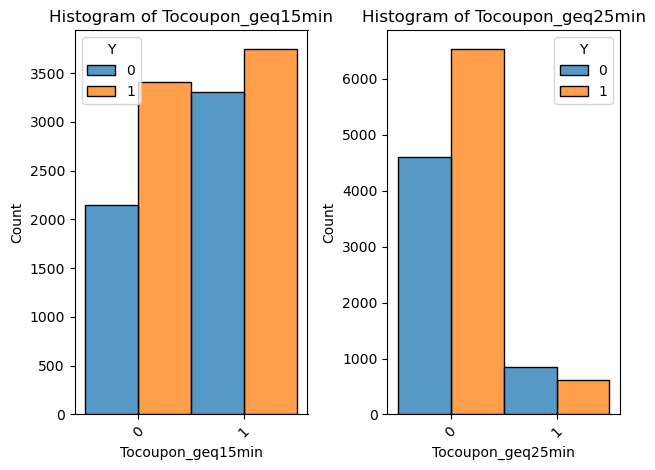

In [78]:
# subplots for 'Tocoupon_geq15min' and 'Tocoupon_geq25min' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Tocoupon_geq15min', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Tocoupon_geq15min')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Tocoupon_geq25min', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Tocoupon_geq25min')

plt.tight_layout()
plt.show()

**Observation:**  'Tocoupon_geq15min' was likely to accept coupons at '0' (61%) and '1' (53%).  
'Tocoupon_geq25min' was likely to accept coupons at '0' (59%) but unlikely to accept coupons at '1' (42%).

**Computation for percent coupon acceptance of 'Tocoupon_geq15min' column elements**

In [79]:
list_Tocoupon_geq15min = coupons['Tocoupon_geq15min'].unique()
pct_acceptance_Tocoupon_geq15min = coupons.query('Tocoupon_geq15min in @list_Tocoupon_geq15min')\
    .groupby('Tocoupon_geq15min')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Tocoupon_geq15min

,Y
Tocoupon_geq15min,
0,0.613763
1,0.531237


**Computation for percent coupon acceptance of 'Tocoupon_geq25min' column elements**

In [80]:
list_Tocoupon_geq25min = coupons['Tocoupon_geq25min'].unique()
pct_acceptance_Tocoupon_geq25min = coupons.query('Tocoupon_geq25min in @list_Tocoupon_geq25min')\
    .groupby('Tocoupon_geq25min')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Tocoupon_geq25min

,Y
Tocoupon_geq25min,
0,0.586974
1,0.419686


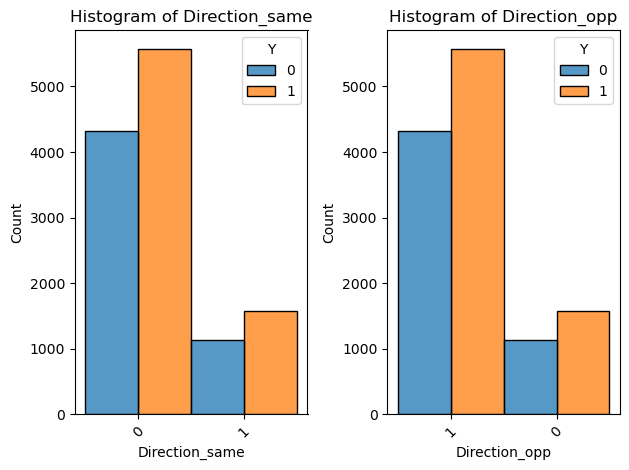

In [81]:
# subplots for 'Direction_same' and 'Direction_opp' histograms
plt.subplot(1,2,1)
sns.histplot(coupons, x='Direction_same', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Direction_same')

plt.subplot(1,2,2)
sns.histplot(coupons, x='Direction_opp', hue='Y', multiple='dodge')
plt.xticks(rotation=45)
plt.title('Histogram of Direction_opp')

plt.tight_layout()
plt.show()

**Observation:**  'Direction_same' was accepting coupons at '1' (58%) and '0' (56%). 'Direction_opp' was the opposite as expected.

In [82]:
list_Direction_same = coupons['Direction_same'].unique()
pct_acceptance_Direction_same = coupons.query('Direction_same in @list_Direction_same')\
    .groupby('Direction_same')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Direction_same

,Y
Direction_same,
1,0.581678
0,0.563688


**Computation for percent coupon acceptance of 'Direction_same' column elements**

**Computation for percent coupon acceptance of 'Direction_opp' column elements**

In [83]:
list_Direction_opp = coupons['Direction_opp'].unique()
pct_acceptance_Direction_opp = coupons.query('Direction_opp in @list_Direction_opp')\
    .groupby('Direction_opp')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Direction_opp

,Y
Direction_opp,
0,0.581678
1,0.563688


**Scatter Plot of Income vs. Age**   
The plot showed the following:
1. Most 16-year olds would accept coupons spread over the income levels.
2. 41-year olds and above would accept coupons at low income level.
3. Most 26-year olds would not accept coupons at almost all income levels save for the highest income level.
4. Most 51-year olds would accept coupons spread over all income levels especially at high income levels.
5. At low income level, 26-year olds to 36-year olds would not accept coupons while 16-year olds and 21-year olds would.

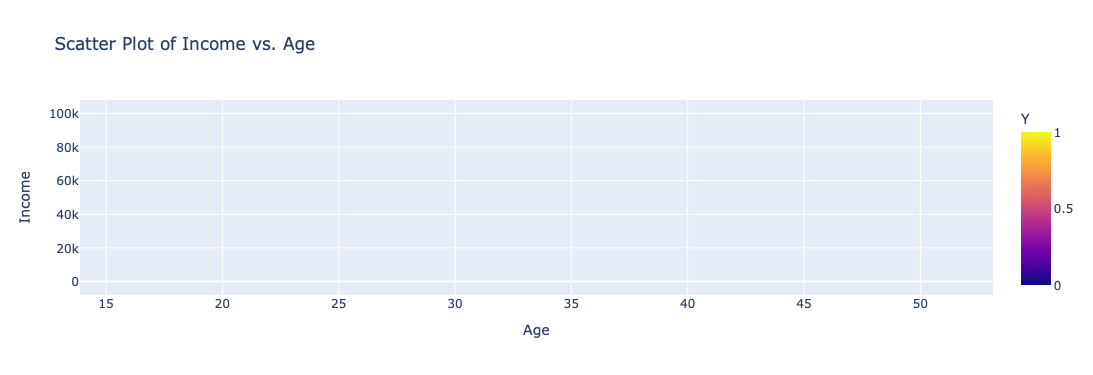

In [84]:
# scatter plot of Income vs. Age
px.scatter(coupons, x='Age', y='Income', color='Y', title='Scatter Plot of Income vs. Age')

**Bar coupons dataframe**   
Proportion of bar coupons accepted

In [85]:
coupons_Bar = coupons[['Bar','Y']]
proportion_accepted_Bar = coupons_Bar['Y'].value_counts(normalize=True).iloc[0]*100
print(f'The proportion of Bar coupons accepted was {round(proportion_accepted_Bar, 2)}%')

The proportion of Bar coupons accepted was 56.76%


**Acceptance rate for bar coupons**  
As shown below, the acceptance rate for bar coupons for those who went to a bar 3 or fewer times a month was less (0.56) compared to those who went more (0.62).

In [86]:
# acceptance rates for 'Bar'
list_Bar = coupons['Bar'].unique()
proportion_acceptance_Bar = coupons.query('Bar in @list_Bar').groupby('Bar')[['Y']].mean()\
    .sort_values(by='Bar')
proportion_acceptance_Bar

,Y
Bar,
0,0.514019
1-3,0.621151
4-8,0.635854
gt8,0.577586
less1,0.563118
never,0.531286


In [87]:
# value counts for 'Bar'
value_counts_Bar = coupons['Bar'].value_counts()
value_counts_Bar = value_counts_Bar.to_frame().sort_values(by='Bar')
value_counts_Bar

,count
Bar,
0,107
1-3,2468
4-8,1071
gt8,348
less1,3438
never,5178


In [88]:
merged_Bar = pd.merge(value_counts_Bar, proportion_acceptance_Bar, on='Bar')
merged_Bar

,count,Y
Bar,,
0,107,0.514019
1-3,2468,0.621151
4-8,1071,0.635854
gt8,348,0.577586
less1,3438,0.563118
never,5178,0.531286


In [89]:
merged_Bar['count_Y'] = merged_Bar['count'] * merged_Bar['Y']
merged_Bar_reset = merged_Bar.reset_index()
merged_Bar_reset

,Bar,count,Y,count_Y
0,0,107,0.514019,55.0
1,1-3,2468,0.621151,1533.0
2,4-8,1071,0.635854,681.0
3,gt8,348,0.577586,201.0
4,less1,3438,0.563118,1936.0
5,never,5178,0.531286,2751.0


In [90]:
# computation of the acceptance rate for bar coupons for those who went to a bar 3 or fewer times a month 
# compared to those who went more
went_3_or_fewer = ['1-3','less1','never','0']
went_more = ['4-8','gt8']
accepted_coupons_fewer = merged_Bar_reset.query('Bar in @went_3_or_fewer')['count_Y'].sum()
accepted_coupons_more = merged_Bar_reset.query('Bar in @went_more')['count_Y'].sum()
total_coupons_fewer = merged_Bar_reset.query('Bar in @went_3_or_fewer')['count'].sum()
total_coupons_more = merged_Bar_reset.query('Bar in @went_more')['count'].sum()
acceptance_rate_fewer = accepted_coupons_fewer / total_coupons_fewer
acceptance_rate_more = accepted_coupons_more / total_coupons_more
print(f'The acceptance rate for bar coupons for those who went to a bar 3 or fewer times a month')
print(f'was {round(acceptance_rate_fewer, 2)} while those who went more was {round(acceptance_rate_more, 2)}')

The acceptance rate for bar coupons for those who went to a bar 3 or fewer times a month
was 0.56 while those who went more was 0.62


**Acceptance rate for those who go to a bar more than once a month and are over the age of 25 compared to all others**  
As shown below, the acceptance rate for those who go to a bar more than once a month and are over the age of 25 (0.58) is less than all the others (0.71).

In [91]:
# acceptance rates for 'Age'
list_Age = coupons['Age'].unique()
pct_acceptance_Age = coupons.query('Age in @list_Age').groupby('Age')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Age

,Y
Age,
16,0.632353
21,0.597653
26,0.595369
46,0.573134
41,0.572084
31,0.545815
36,0.535308
51,0.507019


In [92]:
# value counts for 'Age'
value_counts_Age = coupons['Age'].value_counts()
value_counts_Age

Age
21    2642
26    2548
31    2019
51    1781
36    1317
41    1089
46     670
16     544
Name: count, dtype: int64

In [93]:
# go to a bar more than once a month (total per category)
count_1_3 = value_counts_Bar.iloc[2]
count_4_8 = value_counts_Bar.iloc[3]
count_gt8 = value_counts_Bar.iloc[4]

# over the age of 25 (total per category)
count_26 = value_counts_Age.iloc[1]
count_31 = value_counts_Age.iloc[2]
count_51 = value_counts_Age.iloc[3]
count_36 = value_counts_Age.iloc[4]
count_41 = value_counts_Age.iloc[5]
count_46 = value_counts_Age.iloc[6]

# go to a bar more than once a month (acceptance rate each category)
acceptance_1_3 = proportion_acceptance_Bar.iloc[1]
acceptance_4_8 = proportion_acceptance_Bar.iloc[0]
acceptance_gt8 = proportion_acceptance_Bar.iloc[2]

# over the age of 25 (acceptance rate each category)
acceptance_26 = pct_acceptance_Age.iloc[1]
acceptance_31 = pct_acceptance_Age.iloc[5]
acceptance_51 = pct_acceptance_Age.iloc[7]
acceptance_36 = pct_acceptance_Age.iloc[6]
acceptance_41 = pct_acceptance_Age.iloc[4]
acceptance_46 = pct_acceptance_Age.iloc[3]

# go to a bar more than once a month (total coupons)
total_more_than_Bar = count_1_3 + count_4_8 + count_gt8

# over the age of 25 (total coupons)
total_over_25_Age = count_26 + count_31 + count_51 + count_36 + count_41 + count_46

# go to a bar more than once a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_more_than_Bar = count_1_3 * acceptance_1_3 + count_4_8 * acceptance_4_8 + count_gt8 * acceptance_gt8

# over the age of 25 (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_over_25_Age = count_26 * acceptance_26 + count_31 * acceptance_31 + count_51 * acceptance_51 + count_36 * acceptance_36 + count_41 * acceptance_41 + count_46 * acceptance_46

# acceptance rate for the two conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_two_conditions = (accepted_more_than_Bar + accepted_over_25_Age) / (total_more_than_Bar + total_over_25_Age)

#compute for all others
accepted_coupons_for_two = accepted_more_than_Bar + accepted_over_25_Age
total_coupons_for_two = total_more_than_Bar + total_over_25_Age
total_accepted = proportion_total * len(coupons)
accepted_all_others = total_accepted - accepted_coupons_for_two
total_coupons_all_others = len(coupons) - total_coupons_for_two
acceptance_rate_all_others = accepted_all_others / total_coupons_all_others

print(f'For those who go to a bar more than once a month and are over the age of 25, the acceptance rate was {round(acceptance_rate_for_two_conditions.iloc[0], 2)}')
print(f'For all others, the acceptance rate was {round(acceptance_rate_all_others.iloc[0], 2)}')

For those who go to a bar more than once a month and are over the age of 25, the acceptance rate was nan
For all others, the acceptance rate was nan


**Acceptance rate for those who go to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry compared to all others**  
As shown below, the acceptance rate (0.58) was a bit less than all the others (0.59).

In [94]:
# acceptance rates for 'Passenger'
list_Passenger = coupons['Passenger'].unique()
pct_acceptance_Passenger = coupons.query('Passenger in @list_Passenger').groupby('Passenger')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Passenger

,Y
Passenger,
Friend(s),0.673147
Partner,0.594013
Alone,0.524421
Kid(s),0.504496


In [95]:
# value counts for 'Passenger'
value_counts_Passenger = coupons['Passenger'].value_counts()
value_counts_Passenger

Passenger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

In [96]:
# acceptance rates for 'Occupation'
list_Occupation = coupons['Occupation'].unique()
pct_acceptance_Occupation = coupons.query('Occupation in @list_Occupation').groupby('Occupation')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Occupation

,Y
Occupation,
Healthcare Support,0.698347
Construction & Extraction,0.688312
Healthcare Practitioners & Technical,0.676230
Protective Service,0.643678
Architecture & Engineering,0.634286
Production Occupations,0.620370
Student,0.609524
Office & Administrative Support,0.600313
Transportation & Material Moving,0.596330


In [97]:
# value counts for 'Occupation'
value_counts_Occupation = coupons['Occupation'].value_counts()
value_counts_Occupation

Occupation
Unemployed                                   1861
Student                                      1575
Computer & Mathematical                      1390
Sales & Related                              1088
Education&Training&Library                    939
Management                                    821
Office & Administrative Support               638
Arts Design Entertainment Sports & Media      627
Business & Financial                          543
Retired                                       493
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   239
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            174
Life Physical Social Science           

In [98]:
# value counts for 'Passenger'
value_counts_Passenger = coupons['Passenger'].value_counts()
value_counts_Passenger

Passenger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

In [99]:
# go to a bar more than once a month (total per category)
count_1_3 = value_counts_Bar.iloc[2]
count_4_8 = value_counts_Bar.iloc[3]
count_gt8 = value_counts_Bar.iloc[4]

# passengers that were not a kid (total per category)
count_Alone = value_counts_Passenger.iloc[0]
count_Friends = value_counts_Passenger.iloc[1]
count_Partner = value_counts_Passenger.iloc[2]

# occupations other than fff (total per category)
count_Unemployed = value_counts_Occupation.iloc[0]
count_Student = value_counts_Occupation.iloc[1]
count_Computer = value_counts_Occupation.iloc[2]
count_Sales = value_counts_Occupation.iloc[3]
count_Education = value_counts_Occupation.iloc[4]
count_Management = value_counts_Occupation.iloc[5]
count_Office = value_counts_Occupation.iloc[6]
count_Arts = value_counts_Occupation.iloc[7]
count_Business = value_counts_Occupation.iloc[8]
count_Retired = value_counts_Occupation.iloc[9]
count_Food = value_counts_Occupation.iloc[10]
count_Healthcare_Prac = value_counts_Occupation.iloc[11]
count_Healthcare = value_counts_Occupation.iloc[12]
count_Community = value_counts_Occupation.iloc[13]
count_Legal = value_counts_Occupation.iloc[14]
count_Transportation = value_counts_Occupation.iloc[15]
count_Architecture = value_counts_Occupation.iloc[16]
count_Personal = value_counts_Occupation.iloc[17]
count_Protective = value_counts_Occupation.iloc[18]
count_Life = value_counts_Occupation.iloc[19]
count_Construction = value_counts_Occupation.iloc[20]
count_Installation = value_counts_Occupation.iloc[21]
count_Production = value_counts_Occupation.iloc[22]
count_Building = value_counts_Occupation.iloc[23]

# go to a bar more than once a month (acceptance rate each category)
acceptance_1_3 = proportion_acceptance_Bar.iloc[1]
acceptance_4_8 = proportion_acceptance_Bar.iloc[0]
acceptance_gt8 = proportion_acceptance_Bar.iloc[2]

# passengers that were not a kid  (acceptance rate each category)
acceptance_Alone = pct_acceptance_Passenger.iloc[2]
acceptance_Friends = pct_acceptance_Passenger.iloc[0]
acceptance_Partner = pct_acceptance_Passenger.iloc[1]

# occupations other than fff (acceptance rate each category)
acceptance_Unemployed = pct_acceptance_Occupation.iloc[17]
acceptance_Student = pct_acceptance_Occupation.iloc[6]
acceptance_Computer = pct_acceptance_Occupation.iloc[14]
acceptance_Sales = pct_acceptance_Occupation.iloc[15]
acceptance_Education = pct_acceptance_Occupation.iloc[20]
acceptance_Management = pct_acceptance_Occupation.iloc[10]
acceptance_Office = pct_acceptance_Occupation.iloc[7]
acceptance_Arts = pct_acceptance_Occupation.iloc[21]
acceptance_Business = pct_acceptance_Occupation.iloc[13]
acceptance_Retired = pct_acceptance_Occupation.iloc[24]
acceptance_Food = pct_acceptance_Occupation.iloc[11]
acceptance_Healthcare_Prac = pct_acceptance_Occupation.iloc[2]
acceptance_Healthcare = pct_acceptance_Occupation.iloc[0]
acceptance_Community = pct_acceptance_Occupation.iloc[22]
acceptance_Legal = pct_acceptance_Occupation.iloc[23]
acceptance_Transportation = pct_acceptance_Occupation.iloc[8]
acceptance_Architecture = pct_acceptance_Occupation.iloc[4]
acceptance_Personal = pct_acceptance_Occupation.iloc[16]
acceptance_Protective = pct_acceptance_Occupation.iloc[3]
acceptance_Life = pct_acceptance_Occupation.iloc[12]
acceptance_Construction = pct_acceptance_Occupation.iloc[1]
acceptance_Installation = pct_acceptance_Occupation.iloc[19]
acceptance_Production = pct_acceptance_Occupation.iloc[5]
acceptance_Building = pct_acceptance_Occupation.iloc[9]

# go to a bar more than once a month (total coupons)
total_more_than_Bar = count_1_3 + count_4_8 + count_gt8

# passengers that were not a kid (total coupons)
total_passenger_not_kid = count_Alone + count_Friends + count_Partner

# occupations other than fff (total coupons)
total_occupations_other_than_fff = count_Unemployed + count_Student + count_Computer + count_Sales \
    + count_Education + count_Management + count_Office + count_Arts + count_Business \
    + count_Retired + count_Food + count_Healthcare_Prac + count_Healthcare + count_Community \
    + count_Legal + count_Transportation + count_Architecture + count_Personal \
    + count_Protective +count_Life + count_Construction \
    + count_Installation + count_Production + count_Building

# go to a bar more than once a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_more_than_Bar = count_1_3 * acceptance_1_3 + count_4_8 * acceptance_4_8 + count_gt8 * acceptance_gt8

# passengers that were not a kid (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_passenger_not_kid = count_Alone * acceptance_Alone + count_Friends * acceptance_Friends + count_Partner * acceptance_Partner

# occupations other than fff (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_occupations_other_than_fff = count_Unemployed * acceptance_Unemployed + count_Student * acceptance_Student + count_Computer * acceptance_Computer + count_Sales * acceptance_Sales \
    + count_Education * acceptance_Education + count_Management * acceptance_Management + count_Office * acceptance_Office + count_Arts * acceptance_Arts + count_Business * acceptance_Business \
    + count_Retired * acceptance_Retired + count_Food * acceptance_Food + count_Healthcare_Prac * acceptance_Healthcare_Prac + count_Healthcare * acceptance_Healthcare + count_Community * acceptance_Community \
    + count_Legal * acceptance_Legal + count_Transportation * acceptance_Transportation + count_Architecture * acceptance_Architecture + count_Personal * acceptance_Personal \
    + count_Protective * acceptance_Protective + count_Life * acceptance_Life + count_Construction * acceptance_Construction \
    + count_Installation * acceptance_Installation + count_Production * acceptance_Production + count_Building * acceptance_Building

# acceptance rate for the three conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_three_conditions = (accepted_more_than_Bar + accepted_passenger_not_kid + accepted_occupations_other_than_fff) / (total_more_than_Bar + total_passenger_not_kid + total_occupations_other_than_fff)

#compute for all others
accepted_coupons_for_three = accepted_more_than_Bar + accepted_passenger_not_kid + accepted_occupations_other_than_fff
total_coupons_for_three = total_more_than_Bar + total_passenger_not_kid + total_occupations_other_than_fff
total_accepted = proportion_total * len(coupons)
accepted_all_others = total_accepted - accepted_coupons_for_three
total_coupons_all_others = len(coupons) - total_coupons_for_three
acceptance_rate_all_others_three = accepted_all_others / total_coupons_all_others

print(f'For those who go to a bar more than once a month and had passengers that were not a kid') 
print(f'and had occupations other than farming, fishing, or forestry, the acceptance rate was {round(acceptance_rate_for_three_conditions.iloc[0], 2)}')
print(f'For all others, the acceptance rate was {round(acceptance_rate_all_others_three.iloc[0], 2)}')

For those who go to a bar more than once a month and had passengers that were not a kid
and had occupations other than farming, fishing, or forestry, the acceptance rate was nan
For all others, the acceptance rate was nan


**Acceptance rate for those who go to a bar more than once a month and had passengers that were not a kid and were not widowed**  
As shown below, the acceptance rate was (0.58).

In [100]:
# acceptance rates for 'Maritalstatus'
list_Maritalstatus = coupons['Maritalstatus'].unique()
pct_acceptance_Maritalstatus = coupons.query('Maritalstatus in @list_Maritalstatus').groupby('Maritalstatus')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Maritalstatus

,Y
Maritalstatus,
Single,0.604538
Unmarried partner,0.561098
Married partner,0.542423
Divorced,0.526419
Widowed,0.476923


In [101]:
# value counts for 'Maritalstatus'
value_counts_Maritalstatus = coupons['Maritalstatus'].value_counts()
value_counts_Maritalstatus

Maritalstatus
Married partner      5068
Single               4716
Unmarried partner    2185
Divorced              511
Widowed               130
Name: count, dtype: int64

In [102]:
# value counts for 'Maritalstatus'
value_counts_Maritalstatus = coupons['Maritalstatus'].value_counts()
value_counts_Maritalstatus

Maritalstatus
Married partner      5068
Single               4716
Unmarried partner    2185
Divorced              511
Widowed               130
Name: count, dtype: int64

In [103]:
# go to a bar more than once a month (total per category)
count_1_3 = value_counts_Bar.iloc[2]
count_4_8 = value_counts_Bar.iloc[3]
count_gt8 = value_counts_Bar.iloc[4]

# passengers that were not a kid (total per category)
count_Alone = value_counts_Passenger.iloc[0]
count_Friends = value_counts_Passenger.iloc[1]
count_Partner = value_counts_Passenger.iloc[2]

# not widowed (total per category)
count_Married_partner = value_counts_Maritalstatus.iloc[0]
count_Single = value_counts_Maritalstatus.iloc[1]
count_Unmarried_partner = value_counts_Maritalstatus.iloc[2]
count_Divorced = value_counts_Maritalstatus.iloc[3]

# go to a bar more than once a month (acceptance rate each category)
acceptance_1_3 = proportion_acceptance_Bar.iloc[1]
acceptance_4_8 = proportion_acceptance_Bar.iloc[0]
acceptance_gt8 = proportion_acceptance_Bar.iloc[2]

# passengers that were not a kid  (acceptance rate each category)
acceptance_Alone = pct_acceptance_Passenger.iloc[2]
acceptance_Friends = pct_acceptance_Passenger.iloc[0]
acceptance_Partner = pct_acceptance_Passenger.iloc[1]

# not widowed (acceptance rate each category)
acceptance_Married_partner = pct_acceptance_Maritalstatus.iloc[2]
acceptance_Single = pct_acceptance_Maritalstatus.iloc[0]
acceptance_Unmarried_partner = pct_acceptance_Maritalstatus.iloc[1]
acceptance_Divorced = pct_acceptance_Maritalstatus.iloc[3]

# go to a bar more than once a month (total coupons)
total_more_than_Bar = count_1_3 + count_4_8 + count_gt8

# passengers that were not a kid (total coupons)
total_passenger_not_kid = count_Alone + count_Friends + count_Partner

# not widowed (total coupons)
total_not_widowed = count_Married_partner + count_Single + count_Unmarried_partner + count_Divorced

# go to a bar more than once a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_more_than_Bar = count_1_3 * acceptance_1_3 + count_4_8 * acceptance_4_8 + count_gt8 * acceptance_gt8

# passengers that were not a kid (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_passenger_not_kid = count_Alone * acceptance_Alone + count_Friends * acceptance_Friends + count_Partner * acceptance_Partner

# not widowed (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_not_widowed = count_Married_partner * acceptance_Married_partner + count_Single * acceptance_Single + \
        count_Unmarried_partner * acceptance_Unmarried_partner + count_Divorced * acceptance_Divorced

# acceptance rate for the three conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_above_three = (accepted_more_than_Bar + accepted_passenger_not_kid + accepted_not_widowed) / (total_more_than_Bar + total_passenger_not_kid + total_not_widowed)

print(f'For those who go to a bar more than once a month and had passengers that were not a kid and were not widowed, the acceptance rate was {round(acceptance_rate_for_above_three.iloc[0], 2)}')

For those who go to a bar more than once a month and had passengers that were not a kid and were not widowed, the acceptance rate was nan


**Acceptance rate for those who go to a bar more than once a month and are under the age of 30**  
As shown below, the acceptance rate was (0.61).

In [104]:
# acceptance rates for 'Age'
list_Age = coupons['Age'].unique()
pct_acceptance_Age = coupons.query('Age in @list_Age').groupby('Age')[['Y']].mean()\
    .sort_values(by='Y', ascending=False)
pct_acceptance_Age

,Y
Age,
16,0.632353
21,0.597653
26,0.595369
46,0.573134
41,0.572084
31,0.545815
36,0.535308
51,0.507019


In [105]:
# value counts for 'Age'
value_counts_Age = coupons['Age'].value_counts()
value_counts_Age

Age
21    2642
26    2548
31    2019
51    1781
36    1317
41    1089
46     670
16     544
Name: count, dtype: int64

In [106]:
# go to a bar more than once a month (total per category)
count_1_3 = value_counts_Bar.iloc[2]
count_4_8 = value_counts_Bar.iloc[3]
count_gt8 = value_counts_Bar.iloc[4]

# under the age of 30 (total per category)
count_26 = value_counts_Age.iloc[1]
count_21 = value_counts_Age.iloc[0]
count_16 = value_counts_Age.iloc[7]

# go to a bar more than once a month (acceptance rate each category)
acceptance_1_3 = proportion_acceptance_Bar.iloc[1]
acceptance_4_8 = proportion_acceptance_Bar.iloc[0]
acceptance_gt8 = proportion_acceptance_Bar.iloc[2]

# under the age of 30 (acceptance rate each category)
acceptance_26 = pct_acceptance_Age.iloc[2]
acceptance_21 = pct_acceptance_Age.iloc[1]
acceptance_16 = pct_acceptance_Age.iloc[0]

# go to a bar more than once a month (total coupons)
total_more_than_Bar = count_1_3 + count_4_8 + count_gt8

# under the age of 30 (total coupons)
total_under_Age_30 = count_26 + count_21 +count_16

# go to a bar more than once a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_more_than_Bar = count_1_3 * acceptance_1_3 + count_4_8 * acceptance_4_8 + count_gt8 * acceptance_gt8

# under the age of 30 (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_under_Age_30 = count_26 * acceptance_26 + count_21 * acceptance_21 + count_16 * acceptance_16

# acceptance rate for the two conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_two_conditions_above = (accepted_more_than_Bar + accepted_under_Age_30) / (total_more_than_Bar + total_under_Age_30)

print(f'For those who go to a bar more than once a month and are over the age of 25, the acceptance rate was {round(acceptance_rate_for_two_conditions_above.iloc[0], 2)}')

For those who go to a bar more than once a month and are over the age of 25, the acceptance rate was nan


**Acceptance rate for those who go to a cheap restaurant more than four times a month and income is less than 50k**  
As shown below, the acceptance rate was (0.61).

In [107]:
# acceptance rates for 'Restaurantlessthan20'
list_Restaurantlessthan20 = coupons['Restaurantlessthan20'].unique()
pct_acceptance_Restaurantlessthan20 = coupons.query('Restaurantlessthan20 in @list_Restaurantlessthan20')\
    .groupby('Restaurantlessthan20')[['Y']].mean().sort_values(by='Y', ascending=False)
pct_acceptance_Restaurantlessthan20

,Y
Restaurantlessthan20,
0,0.689922
gt8,0.607644
4-8,0.584014
1-3,0.558999
never,0.534247
less1,0.532593


In [108]:
# value counts for 'Restaurantlessthan20'
value_counts_Restaurantlessthan20 = coupons['Restaurantlessthan20'].value_counts()
value_counts_Restaurantlessthan20

Restaurantlessthan20
1-3      5356
4-8      3553
less1    2071
gt8      1282
never     219
0         129
Name: count, dtype: int64

In [109]:
# acceptance rates for 'Income'
list_Income = coupons['Income'].unique()
pct_acceptance_Income = coupons.query('Income in @list_Income').groupby('Income')[['Y']].mean()\
    .sort_values(by='Income')
pct_acceptance_Income

,Y
Income,
0,0.591876
12500,0.573699
25000,0.593220
37500,0.562674
50000,0.594562
62500,0.525504
75000,0.483645
87500,0.529010
100000,0.577752


In [110]:
# value counts for 'Income'
value_counts_Income = coupons['Income'].value_counts()
value_counts_Income

Income
25000     2006
12500     1825
37500     1795
100000    1717
50000     1655
0         1034
87500      879
75000      856
62500      843
Name: count, dtype: int64

In [111]:
# go to a cheap restaurant more than four times a month (total per category)
count_4_8 = value_counts_Restaurantlessthan20.iloc[1]
count_gt8 = value_counts_Restaurantlessthan20.iloc[3]

# income less than 50k (total per category)
count_37500 = value_counts_Income.iloc[2]
count_25000 = value_counts_Income.iloc[0]
count_12500 = value_counts_Income.iloc[1]
count_0 = value_counts_Income.iloc[5]

# go to a cheap restaurant more than four times a month (acceptance rate each category)
acceptance_4_8 = pct_acceptance_Restaurantlessthan20.iloc[2]
acceptance_gt8 = pct_acceptance_Restaurantlessthan20.iloc[1]

# income less than 50k (acceptance rate each category)
acceptance_37500 = pct_acceptance_Income.iloc[3]
acceptance_25000 = pct_acceptance_Income.iloc[2]
acceptance_12500 = pct_acceptance_Income.iloc[1]
acceptance_0 = pct_acceptance_Income.iloc[0]

# go to a cheap restaurant more than four times a month (total coupons)
total_cheap_restaurant = count_4_8 + count_gt8

# income less than 50k  (total coupons)
total_income_less_50k = count_37500 + count_25000 + count_12500 + count_0

# go to a cheap restaurant more than four times a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_cheap_restaurant = count_4_8 * acceptance_4_8 + count_gt8 * acceptance_gt8

# income less than 50k  (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_income_less_50k = count_37500 * acceptance_37500 + count_25000 * acceptance_25000 + count_12500 * acceptance_12500 + count_0 * acceptance_0

# acceptance rate for the two conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_these_two_conditions = (accepted_more_than_Bar + accepted_under_Age_30) / (total_more_than_Bar + total_under_Age_30)

print(f'For those who go to a cheap restaurant more than four times a month and income is less than 50k, the acceptance rate was {round(acceptance_rate_for_these_two_conditions.iloc[0], 2)}')

For those who go to a cheap restaurant more than four times a month and income is less than 50k, the acceptance rate was nan


### Independent Investigation - Coffeehouse coupons

**Acceptance rate for those who go to a coffeehouse less than four times a month and passenger is not Alone**  
As shown below, the acceptance rate was (0.58).

In [112]:
# acceptance rates for 'Coffeehouse'
list_Coffeehouse = coupons['Coffeehouse'].unique()
pct_acceptance_Coffeehouse = coupons.query('Coffeehouse in @list_Coffeehouse').groupby('Coffeehouse')[['Y']].mean()\
    .sort_values(by='Coffeehouse')
pct_acceptance_Coffeehouse

,Y
Coffeehouse,
0,0.506912
1-3,0.653017
4-8,0.632378
gt8,0.583559
less1,0.546996
never,0.457570


In [113]:
# value counts for 'Coffeehouse'
value_counts_Coffeehouse = coupons['Coffeehouse'].value_counts()
value_counts_Coffeehouse

Coffeehouse
less1    3362
1-3      3199
never    2946
4-8      1779
gt8      1107
0         217
Name: count, dtype: int64

In [114]:
# acceptance rates for 'Passenger'
list_Passenger = coupons['Passenger'].unique()
pct_acceptance_Passenger = coupons.query('Passenger in @list_Passenger').groupby('Passenger')[['Y']].mean()\
    .sort_values(by='Passenger')
pct_acceptance_Passenger

,Y
Passenger,
Alone,0.524421
Friend(s),0.673147
Kid(s),0.504496
Partner,0.594013


In [115]:
# value counts for 'Passenger'
value_counts_Passenger = coupons['Passenger'].value_counts()
value_counts_Passenger

Passenger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

In [116]:
# go to a coffeehouse less than four times a month (total per category)
count_less1 = value_counts_Coffeehouse.iloc[0]
count_1_3 = value_counts_Coffeehouse.iloc[1]
count_never = value_counts_Coffeehouse.iloc[2]
count_0 = value_counts_Coffeehouse.iloc[5]

# passenger is not Alone (total per category)
count_Friends = value_counts_Passenger.iloc[1]
count_Partner = value_counts_Passenger.iloc[2]
count_Kids = value_counts_Passenger.iloc[3]

# go to a coffeehouse less than four times a month (acceptance rate each category)
acceptance_less1 = pct_acceptance_Coffeehouse.iloc[4]
acceptance_1_3 = pct_acceptance_Coffeehouse.iloc[1]
acceptance_never = pct_acceptance_Coffeehouse.iloc[5]
acceptance_0 = pct_acceptance_Coffeehouse.iloc[1]

# passenger is not Alone (acceptance rate each category)
acceptance_Friends = pct_acceptance_Passenger.iloc[1]
acceptance_Partner = pct_acceptance_Passenger.iloc[2]
acceptance_Kids = pct_acceptance_Passenger.iloc[3]

# go to a coffeehouse less than four times a month (total coupons)
total_coffeehouse_less_four = count_less1 + count_1_3 + count_never + count_0

# passenger is not Alone (total coupons)
total_not_Alone = count_Friends + count_Partner + count_Kids

# go to a coffeehouse less than four times a month (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_coffeehouse_less_four = count_less1 * acceptance_less1 + count_1_3 * acceptance_1_3 + count_never * acceptance_never + count_0 * acceptance_0

# passenger is not Alone (accepted coupons)
# total per category multiply by acceptance rate each category
accepted_not_Alone = count_Friends * acceptance_Friends + count_Partner * acceptance_Partner + count_Kids * acceptance_Kids

# acceptance rate for the two conditions
# total accepted coupons divided by total coupons
acceptance_rate_for_above_two_conditions = (accepted_coffeehouse_less_four + accepted_not_Alone) / (total_coffeehouse_less_four + total_not_Alone)

print(f'For those who go to a coffeehouse less than four times a month and passenger was not Alone, the acceptance rate was {round(acceptance_rate_for_above_two_conditions.iloc[0], 2)}')

For those who go to a coffeehouse less than four times a month and passenger was not Alone, the acceptance rate was 0.58


**Comparison of the following::**  

The acceptance rates between those drivers who:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed **(0.58)**
- go to bars more than once a month and are under the age of 30 **(0.61)**
- go to cheap restaurants more than 4 times a month and income is less than 50K **(0.61)**